Diabetes Dataset Analysis


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv ("D:\\NTI Tanta Data Analysis\\lec6\\Assignment\\Task 2\\diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Column Name	Description
Pregnancies:	Number of times the patient has been pregnant.
Glucose:	Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
BloodPressure	Diastolic blood pressure (mm Hg).
SkinThickness:	Triceps skinfold thickness (mm). This is a way to estimate body fat.
Insulin	:2-hour serum insulin (mu U/ml). High or low values might indicate insulin resistance.
BMI:	Body Mass Index (weight in kg / (height in m)^2). A measure of body fat.
DiabetesPedigreeFunction:	A function that scores the likelihood of diabetes based on family history.
Age:L	Age of the patient (in years).
Outcome:	Diabetes test result: 0 = Non-diabetic, 1 = Diabetic. This is your target variable.

Data Cleaning

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               769 non-null    int64  
 1   Glucose                   769 non-null    int64  
 2   BloodPressure             769 non-null    int64  
 3   SkinThickness             769 non-null    int64  
 4   Insulin                   769 non-null    int64  
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  769 non-null    float64
 7   Age                       769 non-null    int64  
 8   Outcome                   769 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.2 KB


In [6]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,3.840052,120.897269,69.115735,20.509753,79.697009,31.998179,0.471590,33.269181,0.349805
std,3.370237,31.951886,19.345296,15.959020,115.203999,7.880557,0.331208,11.778737,0.477219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.000000,36.600000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.dropna(inplace=True) 

df.isnull().sum()
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


EDA and visulaziation

1. Count of Diabetic vs Non-Diabetic

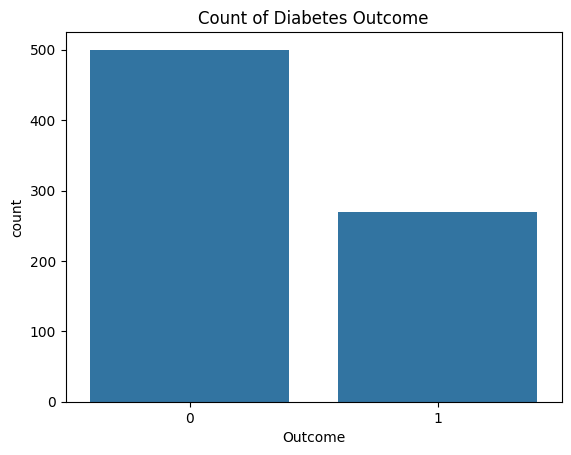

In [10]:
sns.countplot(x='Outcome', data=df)
plt.title('Count of Diabetes Outcome')
plt.show()

2. Distribution of Glucose

Text(0.5, 1.0, 'Distribution of Glucose')

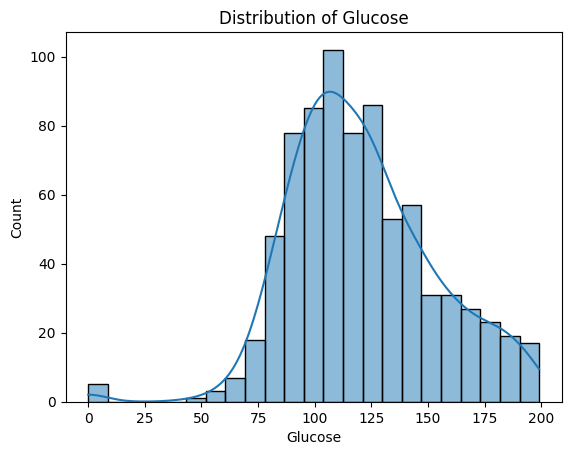

In [11]:
sns.histplot(df['Glucose'],kde=True)
plt.title('Distribution of Glucose')


3. Age Distribution

Text(0.5, 1.0, 'Distribution of Age')

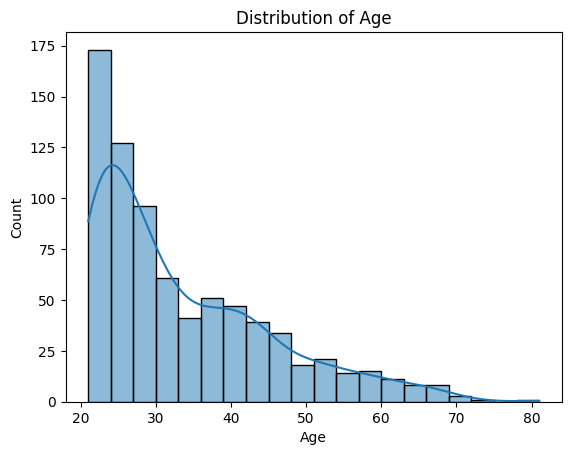

In [12]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

5. Insulin Distribution (filtering out zeros)


Text(0.5, 1.0, 'Insulin Distribution (Non-zero)')

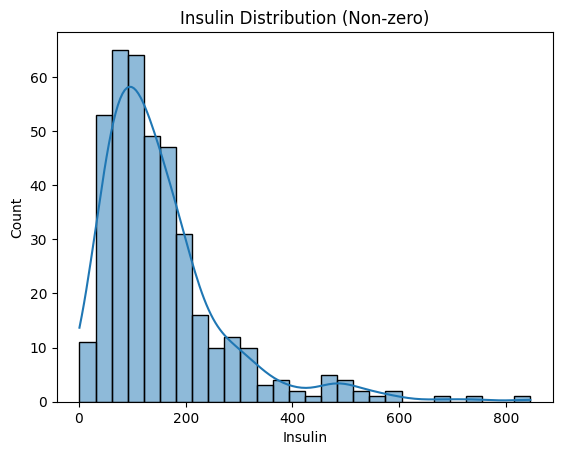

In [21]:
#x=df[df['Insulin']>0]


sns.histplot(df[df['Insulin'] > 0]['Insulin'], kde=True)
plt.title('Insulin Distribution (Non-zero)')

6.Boxplot of Age by Outcome

Text(0.5, 1.0, 'Age vs Diabetes Outcome')

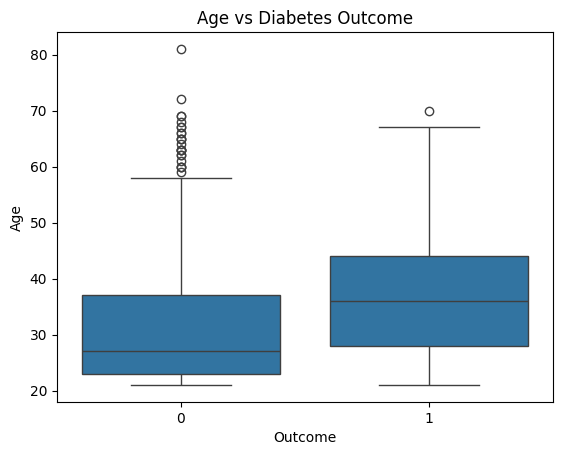

In [22]:
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title('Age vs Diabetes Outcome')

7. Boxplot of Glucose by Outcome


Text(0.5, 1.0, 'Glucose vs Diabetes Outcome')

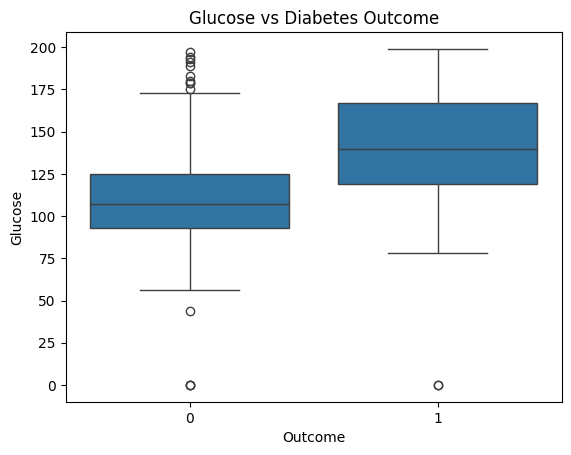

In [23]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose vs Diabetes Outcome')

8. BMI vs Age (colored by Outcome)

In [ ]:
sns.scatterplot(data=df, x='Age', y='BMI', hue='Outcome')
plt.title('BMI vs Age by Diabetes Outcome')

9. Heatmap of Feature Correlations
py


Text(0.5, 1.0, 'Correlation Matrix')

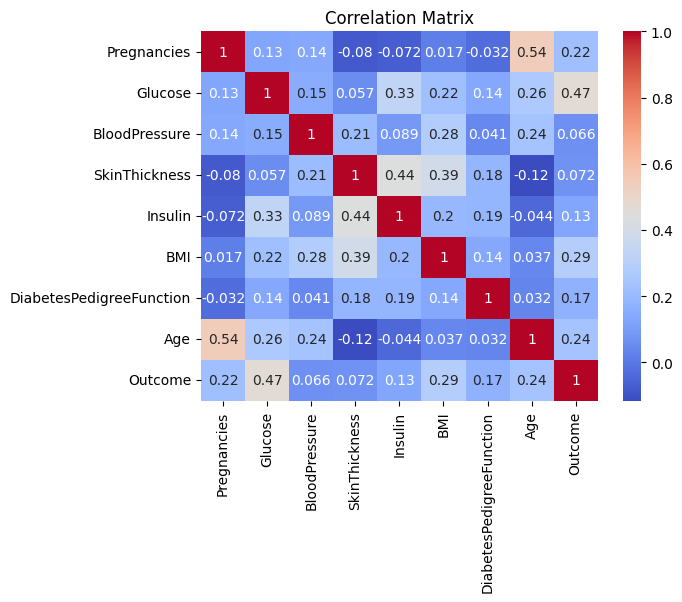

In [24]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")

10.Average Glucose by Outcome

Text(0.5, 1.0, 'Average Glucose by Outcome')

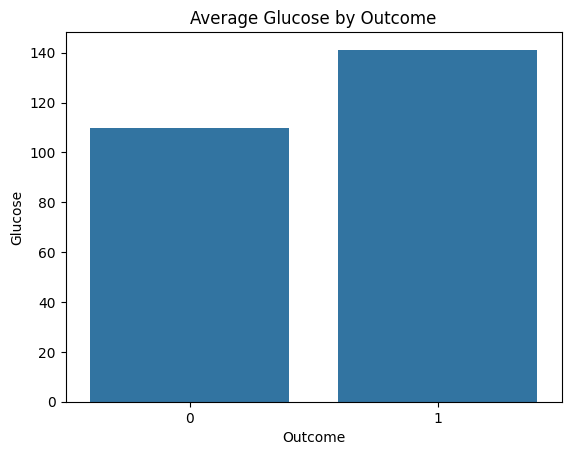

In [31]:
sns.barplot(df.groupby('Outcome')['Glucose'].mean())
plt.title('Average Glucose by Outcome')


11. Average BMI by Outcome


Text(0.5, 1.0, 'Average BMI by Outcome')

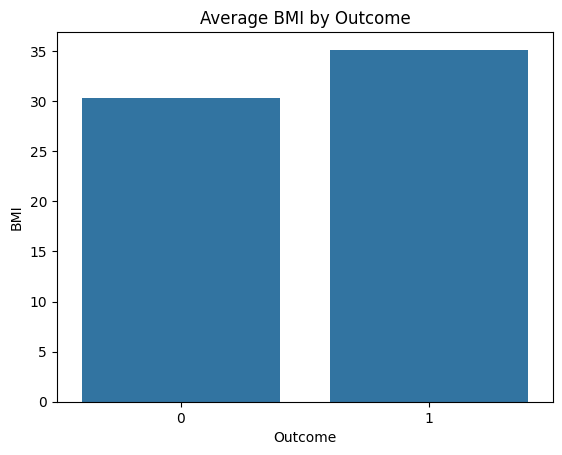

In [32]:
sns.barplot(df.groupby('Outcome')['BMI'].mean())
plt.title('Average BMI by Outcome')

12. Pregnancies vs Outcome


Text(0.5, 1.0, 'Pregnancies vs Diabetes Outcome')

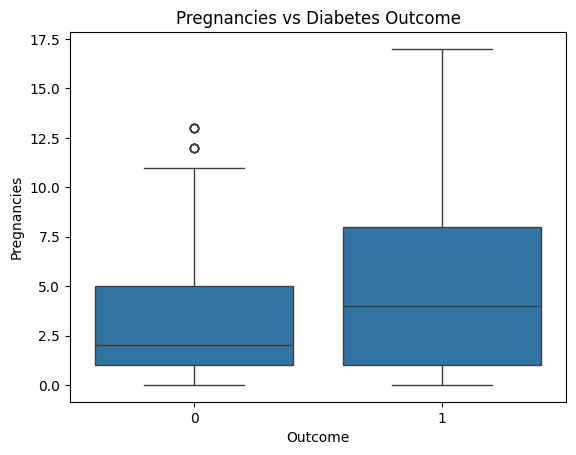

In [33]:
sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.title('Pregnancies vs Diabetes Outcome')

13. DiabetesPedigreeFunction vs Outcome


Text(0.5, 1.0, 'Diabetes Pedigree Function vs Outcome')

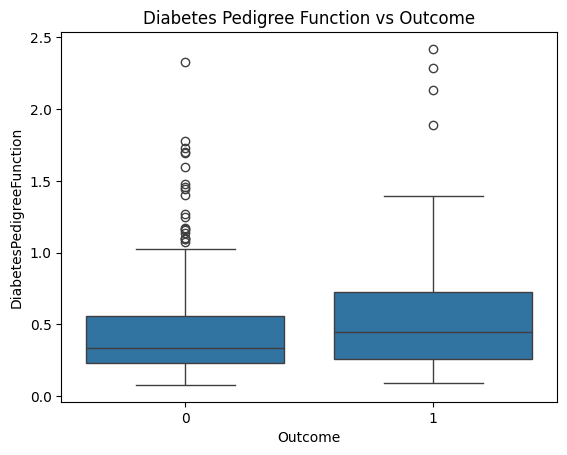

In [34]:
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.title('Diabetes Pedigree Function vs Outcome')

14. Diabetes Outcome Distribution


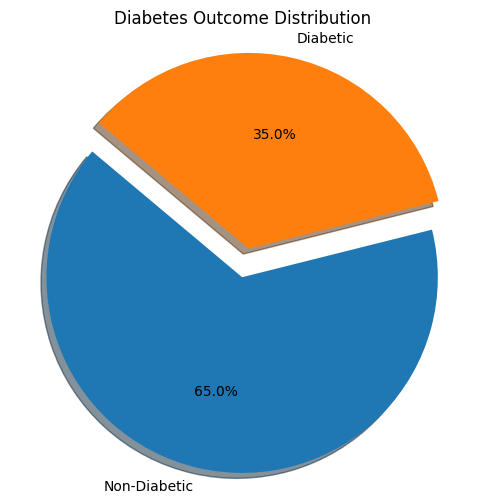

In [39]:
plt.figure(figsize=(6,6))
plt.pie(df['Outcome'].value_counts(), labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', startangle=140,shadow=True,explode=[0,0.15])
plt.title('Diabetes Outcome Distribution')
plt.axis('equal')  # keeps the pie circular
plt.show()

15. Relation between SkinThickness	and outcome 

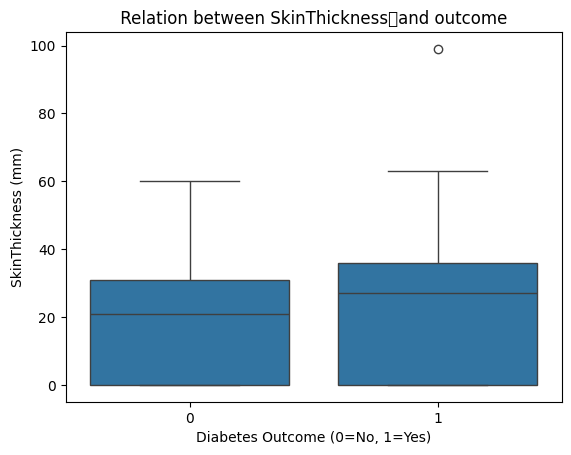

In [48]:
sns.boxplot(data=df,x='Outcome',y='SkinThickness')
plt.title(' Relation between SkinThickness	and outcome ')
plt.xlabel('Diabetes Outcome (0=No, 1=Yes)')
plt.ylabel('SkinThickness (mm)')
plt.show()


16.Scatter Plot: Glucose vs BloodPressure

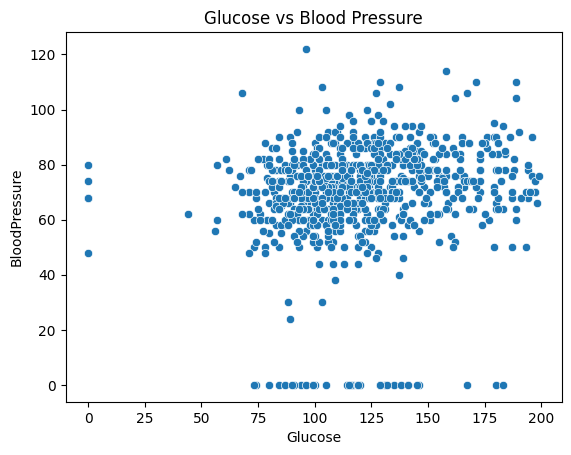

In [49]:
sns.scatterplot(data=df, x='Glucose', y='BloodPressure')
plt.title('Glucose vs Blood Pressure')
plt.show()